In [43]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
from IPython.core.display import display, HTML, Markdown
from cpymad.madx import Madx
%matplotlib notebook

### Yann's example extracting a Matrix from MADX
https://gitlab.cern.ch/abt-optics-and-code-repository/simulation-codes/cpymad_examples/-/blob/master/MATRIX_extraction.ipynb

In [44]:
def get_matrix_from_twiss(twiss):
    elem = twiss.iloc[-1] # iloc[-1] takes last row of the data frame
    matExtracted = np.matrix([
        elem[['re11', 're12', 're13', 're14', 're15', 're16']].values.astype(float),
        elem[['re21', 're22', 're23', 're24', 're25', 're26']].values.astype(float),
        elem[['re31', 're32', 're33', 're34', 're35', 're36']].values.astype(float),
        elem[['re41', 're42', 're43', 're44', 're45', 're46']].values.astype(float),
        elem[['re51', 're52', 're53', 're54', 're55', 're56']].values.astype(float),
        elem[['re61', 're62', 're63', 're64', 're65', 're66']].values.astype(float),
    ])
    return matExtracted

### This is a test to run the whole get_initial_conditions_lhc_q20.madx file

In [45]:
## madx = Madx(command_log="commandlog") #Writes the errors in this file once madx has quit
## madx.option(verbose=False, debug=False, echo=True, warn=False, twiss_print=False) #Hides the output in the terminal
## madx.call("/eos/user/e/eljohnso/SWAN_projects/acc-models-tls/ps_extraction/tt2tt10_lhc_q20/stitched/get_initial_conditions_lhc_q20.madx")
## madx.quit()

## D16STRAY and F16SHIM are the two elements to consider fringe fields in MU16

#### we place them as seen in: https://gitlab.cern.ch/acc-models/acc-models-tls/-/blob/2021/ps_extraction/tt2tt10_lhc_q20/stitched/get_initial_conditions_lhc_q20.madx

In [56]:
madx = Madx(command_log="commandlog") #Writes the errors in this file once madx has quit
madx.option(verbose=False, debug=False, echo=True, warn=False, twiss_print=False)

madx.beam(particle='proton', pc=26, exn=3.5e-6,eyn=3.5E-6)
madx.input('BRHO:= BEAM->PC * 3.3356;')

#len_ft16 = 7.701173928

# madx.command.sequence.clone('S1', refer=entry, l=len_ft16)
madx.input('FT16: sequence, refer=entry, l=7.701173928;')
madx.command.endsequence()

madx.command.rbend.clone('D16STRAY', L=2.20480, ANGLE=0.0, K1=-.047, K2=0.33)
madx.command.rbend.clone('F16SHIM', L=2.19624,ANGLE=0.021,K1=0.0)

madx.command.seqedit(sequence='FT16')
madx.command.install(element='D16STRAY_1', class_='D16STRAY', at='2.700072902') # Random positions, remeber starts from middle
madx.command.install(element='F16SHIM_1', class_='F16SHIM', at='4.904893572')
madx.command.endedit()

madx.use(sequence="FT16")


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.07.21 16:08:13      +
  ++++++++++++++++++++++++++++++++++++++++++++


#### Here I used the Initial conditions from MADX stitched model of PS extraction to TT10 LHC Q20 beam

- betx0              =       2.5103613982e+01 ;
- bety0              =       8.3789531557e+00 ;
- alfx0              =      -2.3322645191e+00 ;
- alfy0              =       9.7954156718e-01 ;
- dx0                =       3.0982680415e+00 ;
- dy0                =       0.0000000000e+00 ;
- dpx0               =       2.6262543044e-01 ;
- dpy0               =       0.0000000000e+00 ;

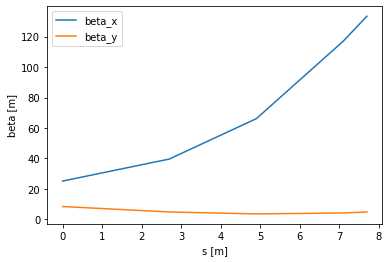

In [59]:
twiss = madx.twiss(betx=2.5103613982e+01, bety=8.3789531557e+00,
                   alfx=-2.3322645191e+00, alfy=9.7954156718e-01,
                   dx=3.0982680415e+00, dy=0.0000000000e+00,
                   dpx=2.6262543044e-01, dpy=0.0000000000e+00,
                   rmatrix=True).dframe()

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(twiss.s, twiss.betx,label='beta_x')
plt.plot(twiss.s, twiss.bety,label='beta_y')
plt.xlabel('s [m]')
plt.ylabel('beta [m]')
plt.legend()
plt.show()

In [54]:
madx.quit()


  Number of warnings: 0

  ++++++++++++++++++++++++++++++++++++++++++++
  +          MAD-X finished normally         +
  ++++++++++++++++++++++++++++++++++++++++++++
